# Titanic analysis

In [1]:
# External imports
import sys
import pandas as pd 

# Internal imports
sys.path.append('../Common')
from PlotUtils import Plot
from TitanicUtils import CompareResults


### Load and inspect data

In [ ]:
# Load DataFrames
train_ = pd.read_csv('../Data/titanic/train.csv') 
test_ = pd.read_csv('../Data/titanic/test.csv')
train_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Modelling function

In [3]:
def run_model(train_, test_, model, fout):
    # Training parameter 
    y_ = train_["Survived"]

    # Define the features in the training and test datasets
    features_ = ["Pclass", "Sex", "SibSp", "Parch"]

    X_ = pd.get_dummies(train_[features_])  # Create boolean dummy variables for categorical features
    X_test_ = pd.get_dummies(test_[features_])  # Same for the test set

    # Fit the model on the training dataset
    model.fit(X_, y_)

    # Make predictions on the test dataset
    predictions_ = model.predict(X_test_)

    # Output results
    output_ = pd.DataFrame({'PassengerId': test_.PassengerId, 'Survived': predictions_})
    foutName = f'../Output/Titanic/{fout}.csv'
    output_.to_csv(foutName, index=False)
    print(f'---> Written:\n{foutName}')

    # Compare
    comp = CompareResults(test_, train_, output_)
    return comp.run() # returns std_dev, std_dev_err of residuals across all parameters (rough indicator of accuracy)

### Results container (standard deviation of residuals / model)

In [4]:
results = {}

### Random forest classifier (tutorial example)

---> Written:
../Output/Titanic/RandomForestClassifier.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


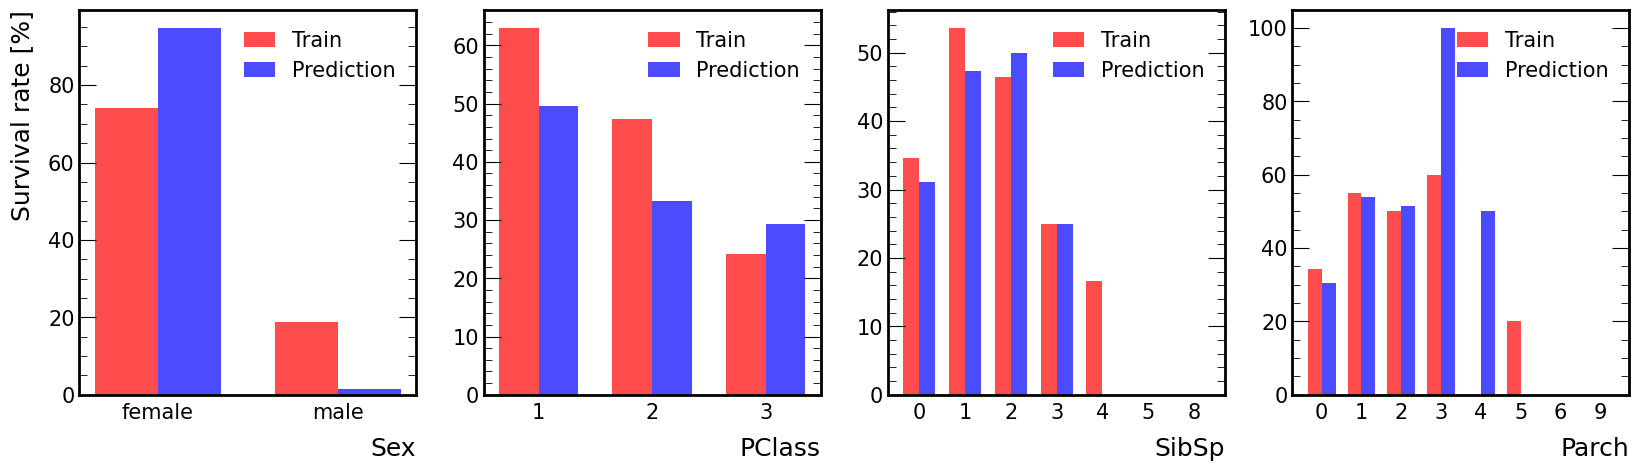

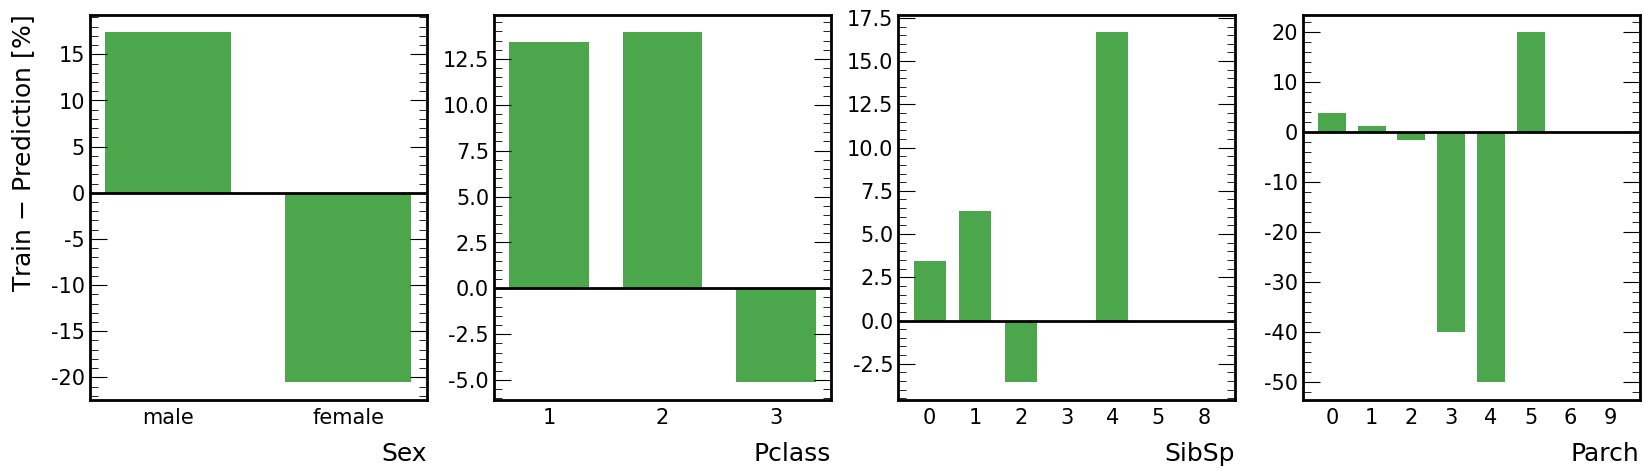

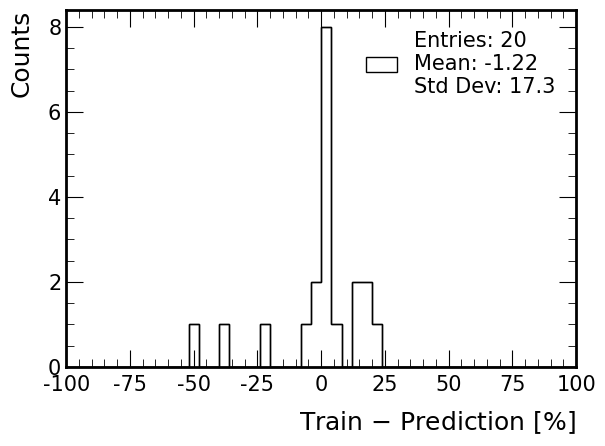

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialise model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Run
name = 'RandomForestClassifier'
results[name] = run_model(train_, test_, model, name)


## Logistic regression

---> Written:
../Output/Titanic/LogisticRegression.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


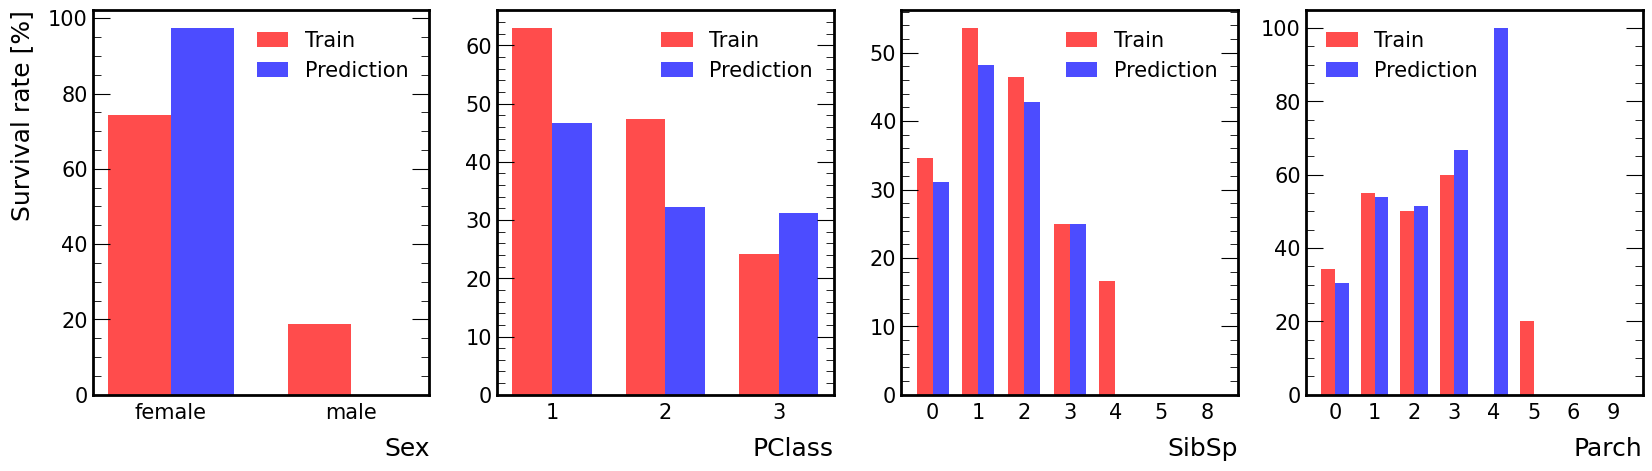

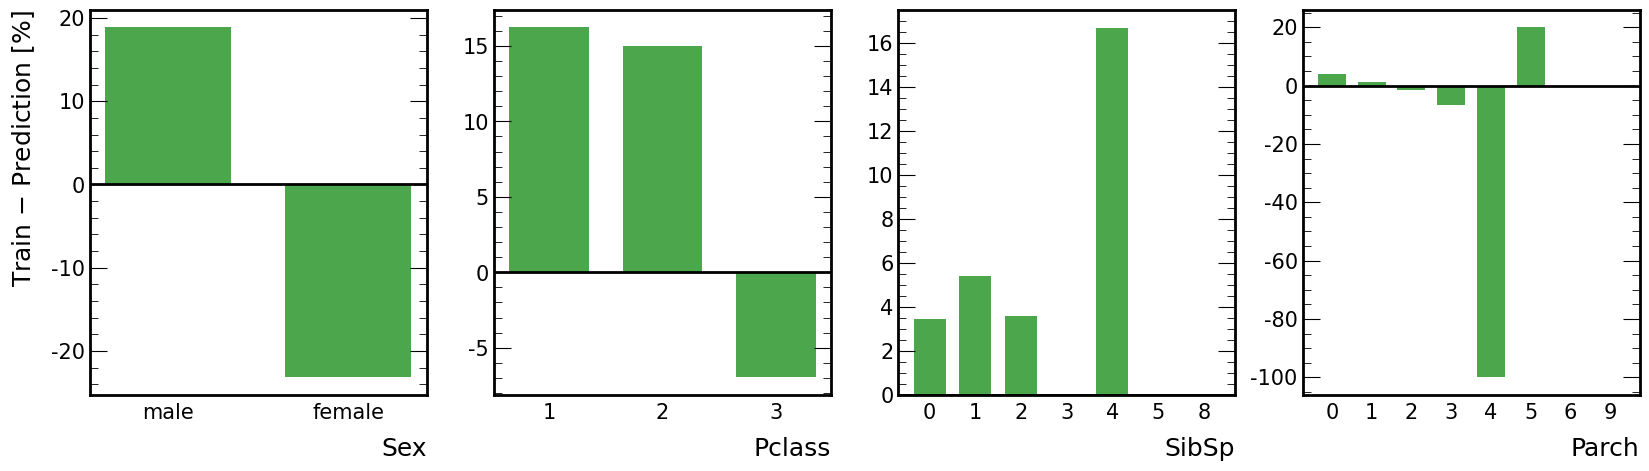

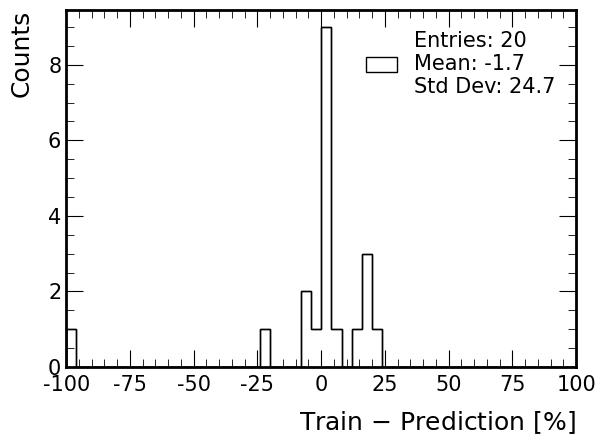

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialise model
model = LogisticRegression(random_state=1)

# Run
name = 'LogisticRegression'
results[name] = run_model(train_, test_, model, name)



## Decision tree


---> Written:
../Output/Titanic/DecisionTreeClassifier.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


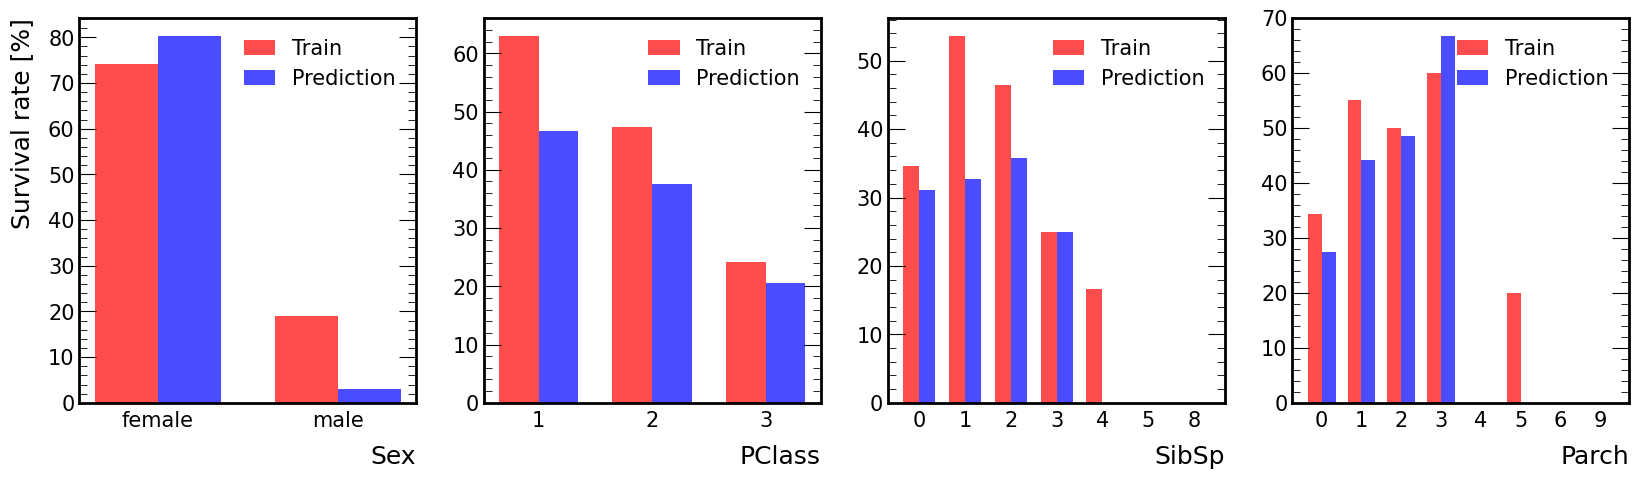

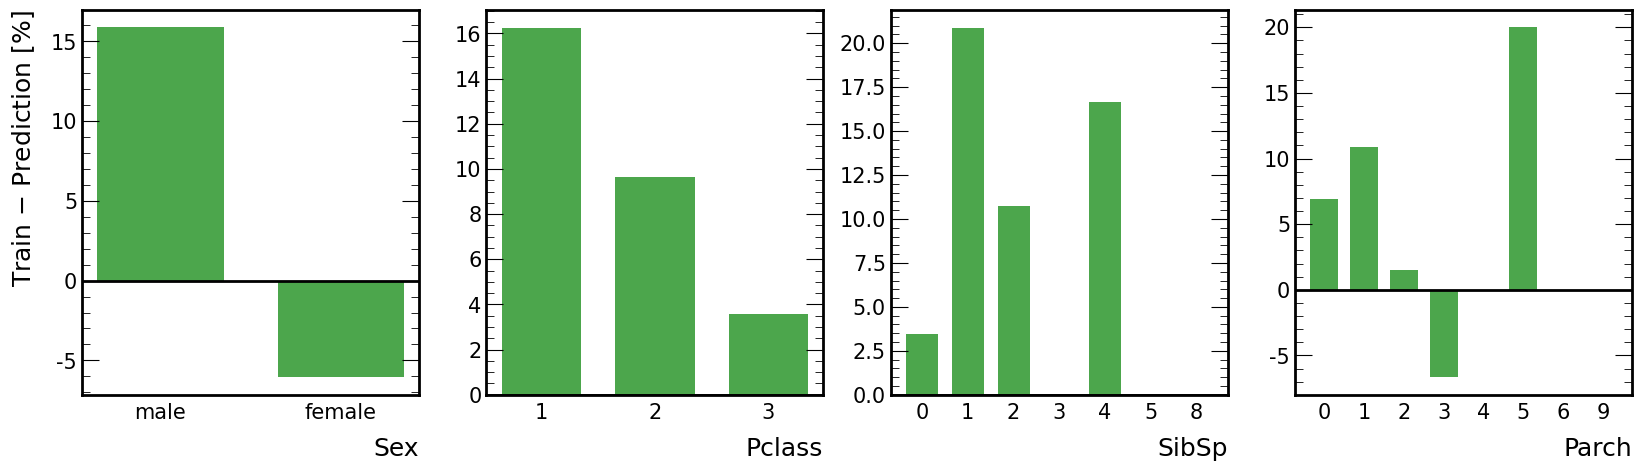

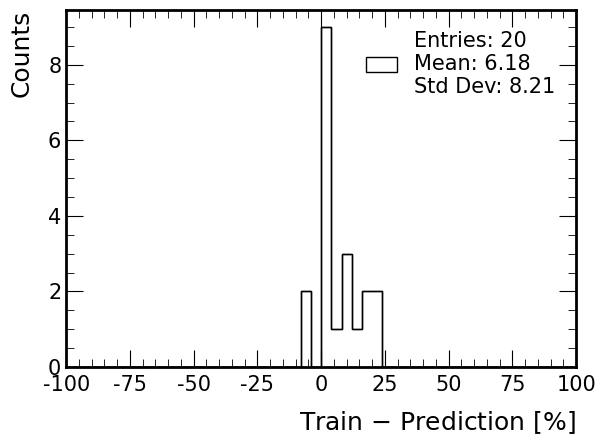

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialise model
model = DecisionTreeClassifier(random_state=1)

# Run
name = 'DecisionTreeClassifier'
results[name] = run_model(train_, test_, model, name)


# Gradient boosting

---> Written:
../Output/Titanic/GradientBoostingClassifier.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


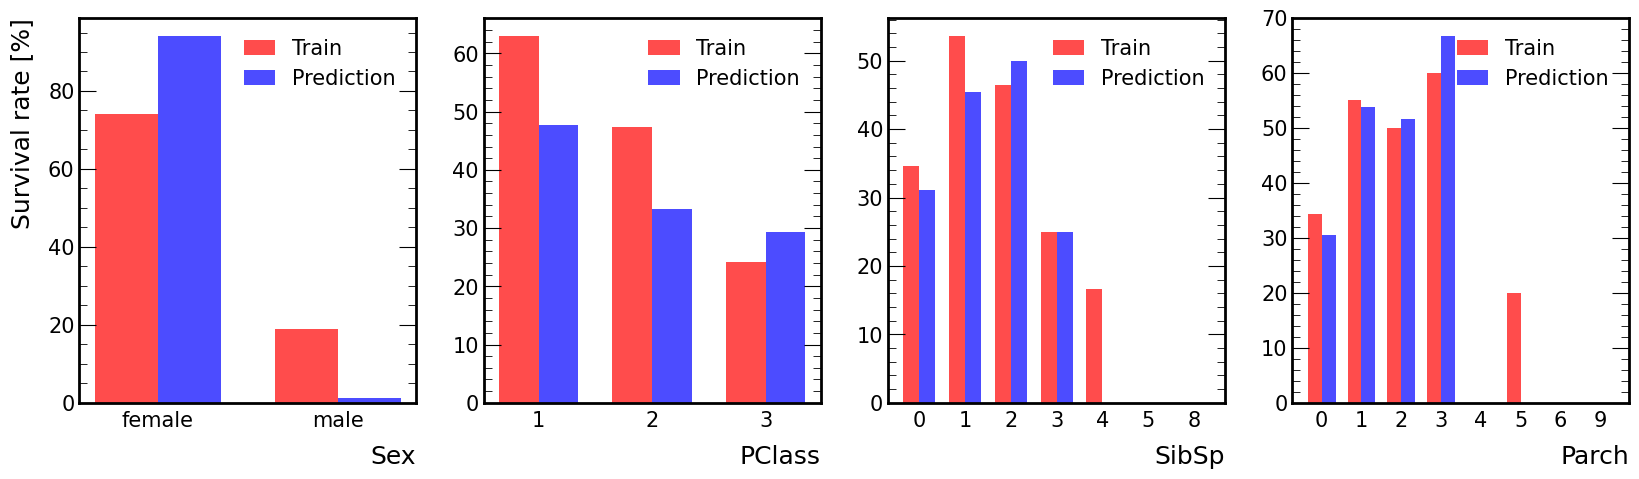

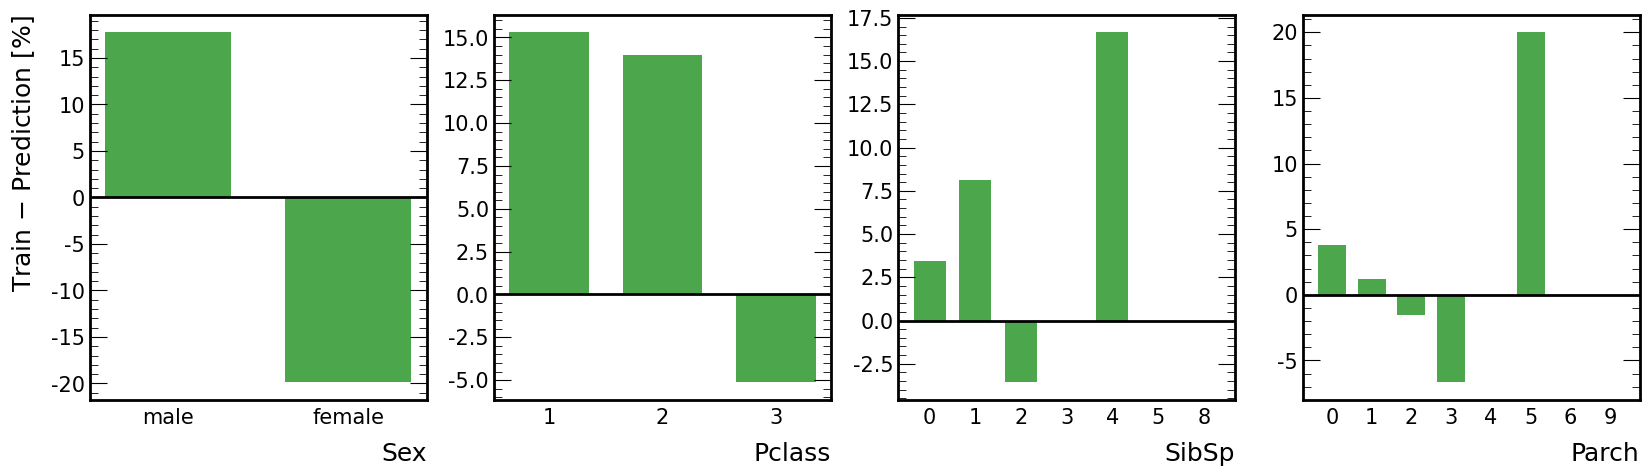

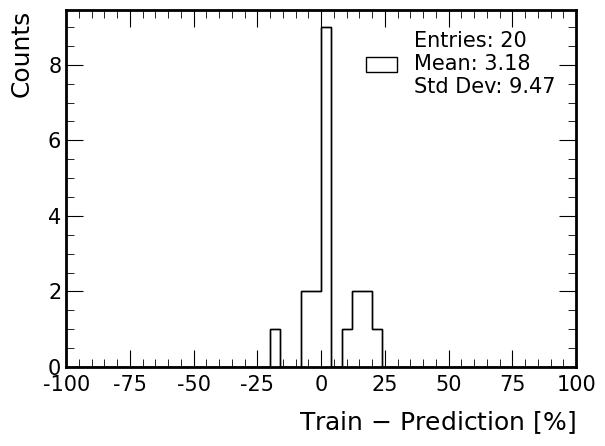

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialise model
model = GradientBoostingClassifier(random_state=1)

# Run
name = 'GradientBoostingClassifier'
results[name] = run_model(train_, test_, model, name)


## Support vector machines (SVM)

---> Written:
../Output/Titanic/SupportVectorMachines.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


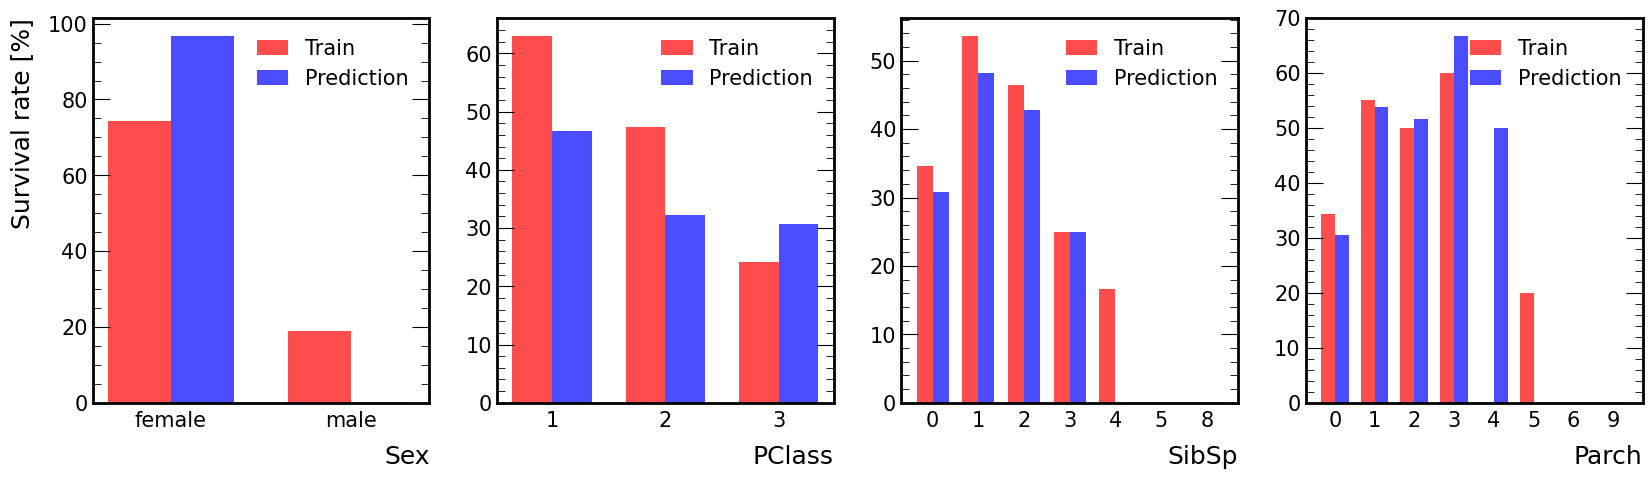

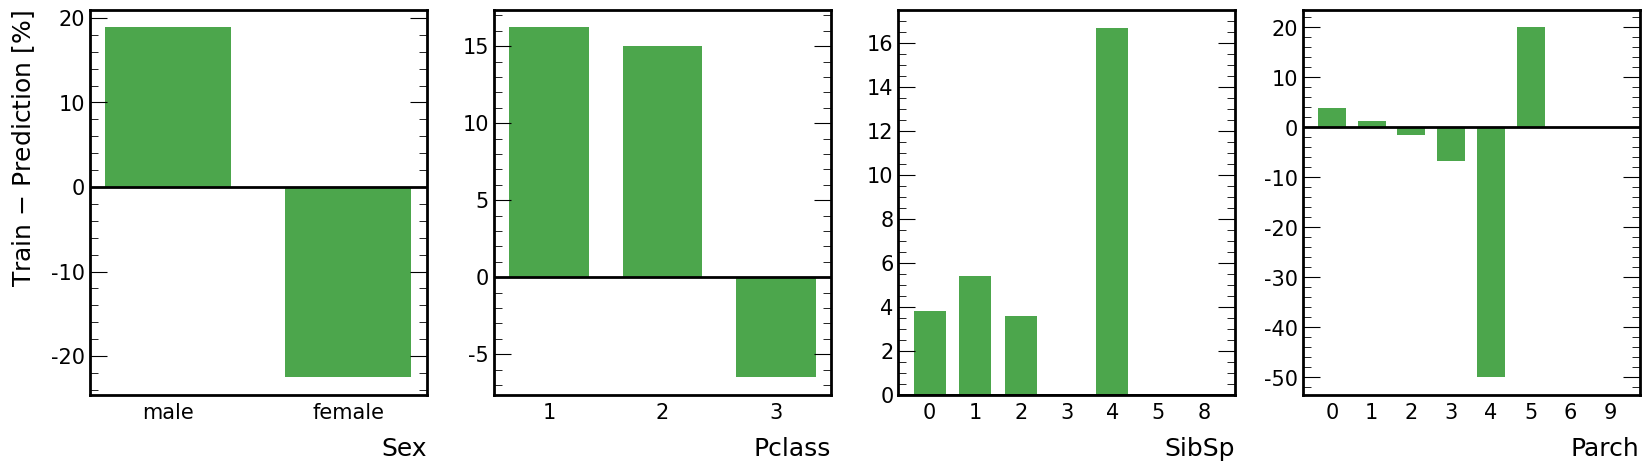

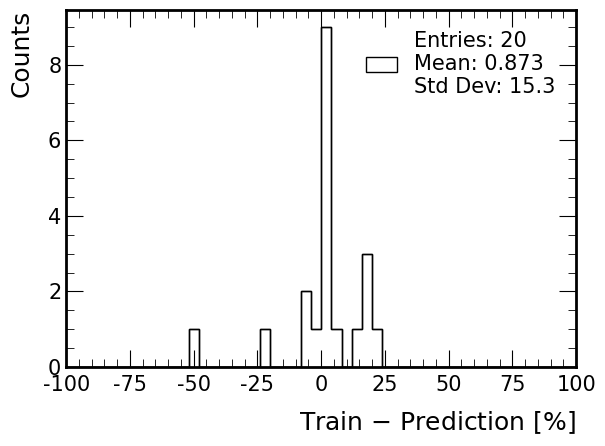

In [9]:
from sklearn.svm import SVC

# Initialise model
model = SVC(random_state=1)

# Run
name = 'SupportVectorMachines'
results[name] = run_model(train_, test_, model, name)



## Neural network (MLP)

---> Written:
../Output/Titanic/MLPClassifier.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


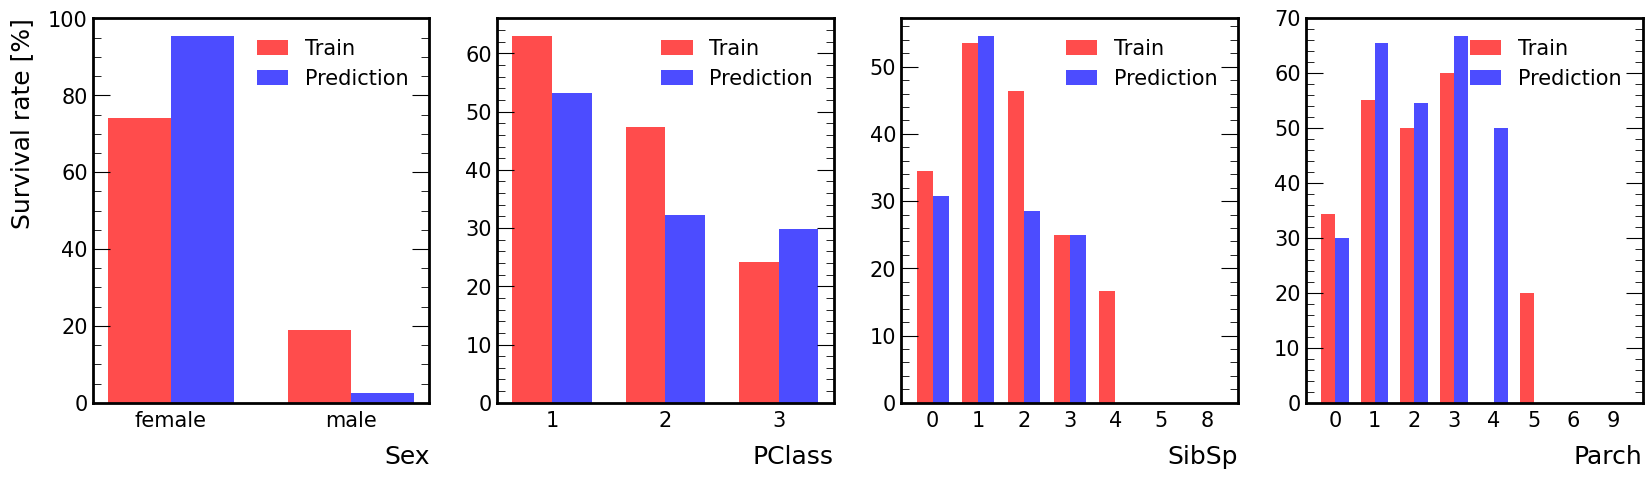

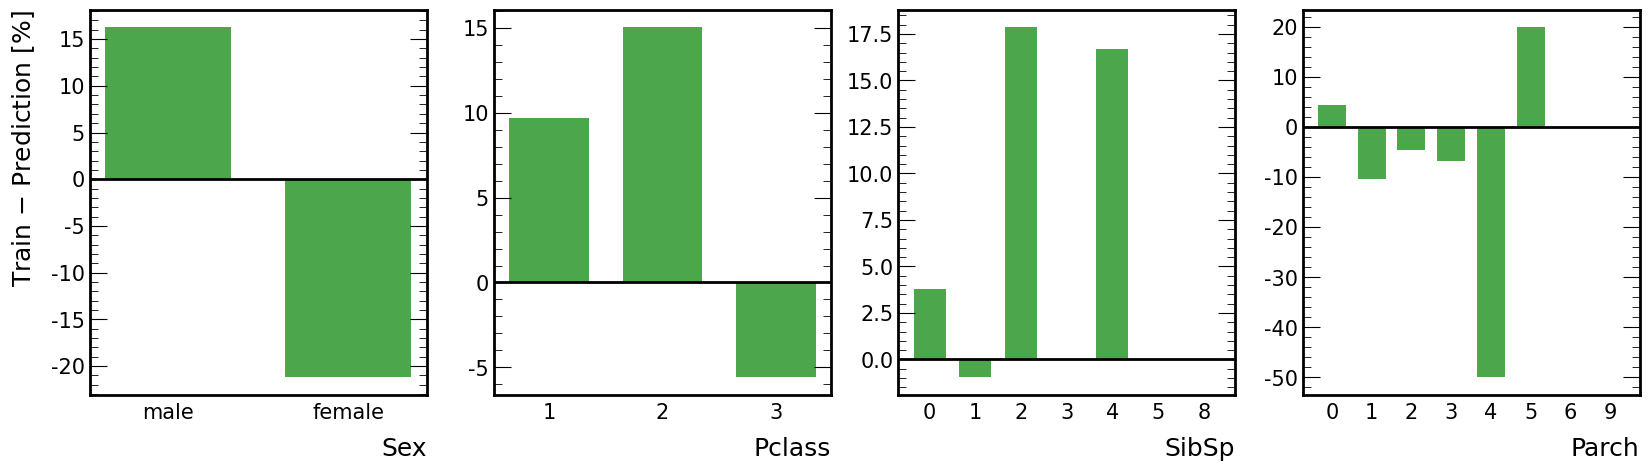

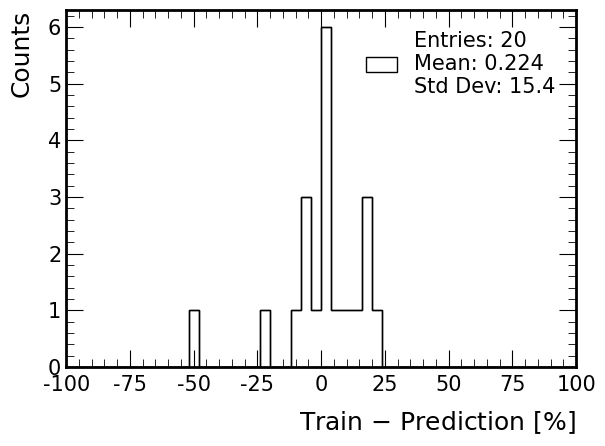

In [10]:
from sklearn.neural_network import MLPClassifier

# Initialise model
model = MLPClassifier(random_state=1, max_iter=1000)  # Can increase max_iter if convergence issues occur

# Run
name = 'MLPClassifier'
results[name] = run_model(train_, test_, model, name)



### Evaluate performance / model based on standard deviation of residuals

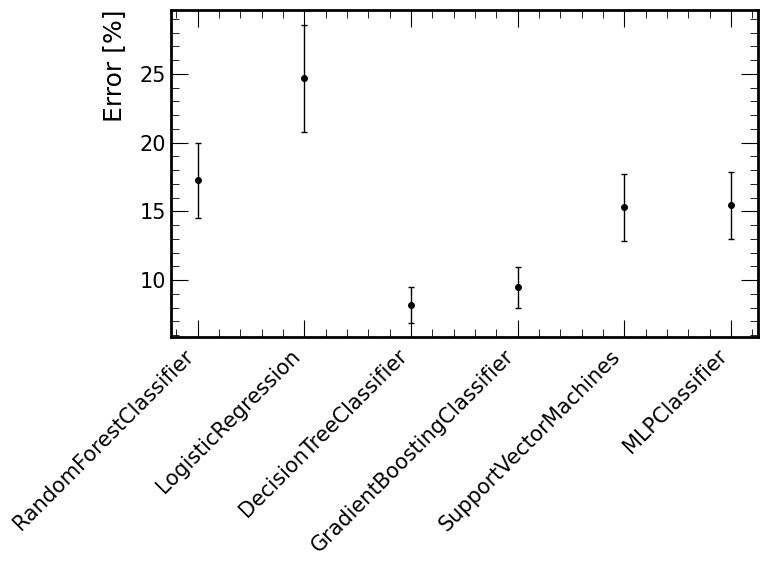

In [14]:
x = list(results.keys())
y = [] 
yerr = [] 
for val in results.values():
    y.append(val[0]) 
    yerr.append(val[1])

pl = Plot() 

pl.plot_graph(
    x=x, y=y, yerr=yerr,
    ylabel='Error [%]', save=False)
       


### Actual performance

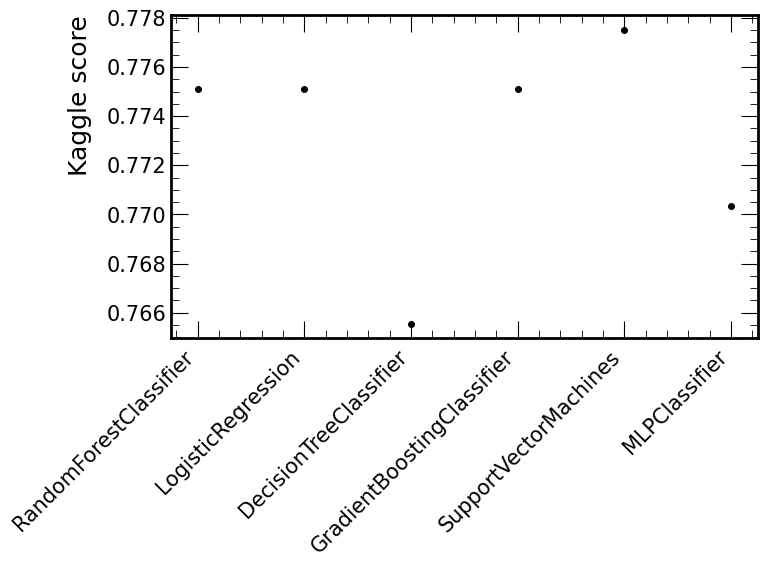

In [18]:
results_true = {
    'RandomForestClassifier' : 0.7751,
    'LogisticRegression' : 0.7751,
    'DecisionTreeClassifier' : 0.76555,
    'GradientBoostingClassifier' : 0.7751,
    'SupportVectorMachines' : 0.77751,
    'MLPClassifier' : 0.77033
}

pl.plot_graph(
    x=list(results_true.keys()), y=list(results_true.values()),
    ylabel='Kaggle score', save=False)